# K-Shape Experiments

In [53]:
from kshape.core import kshape
from kshape.core import KShapeClusteringCPU
import os
import csv
import time
import numpy as np
from sklearn.metrics import rand_score, normalized_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Useful Functions

In [9]:
class ClusterDataLoader:
    def __init__(self, dataset_path):
        self.path = dataset_path

    def load(self, sub_dataset_name):
        ts, labels = [], []
        for mode in ['_TRAIN']:
            with open(os.path.join(self.path,sub_dataset_name + mode)) as csv_file: #sub_dataset_name, sub_dataset_name + mode)) as csv_file:
                lines = csv.reader(csv_file, delimiter=',')
                for line in lines:
                    ts.append([float(x) for x in line[1:]])
                    labels.append(int(line[0])-1)

        if min(labels) == 1:
            labels = labels - 1
        if min(labels) == -1:
            labels = labels + 1

        return np.array(ts), np.array(labels), int(len(set(labels)))

In [40]:
def apply_kshape(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    # ts.shape
    start_time = time.time()
    ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
    ksc.fit(np.expand_dims(ts, axis=2))
    
    return time.time() - start_time 

In [49]:
def line_plot(x,y,title,xlabel,ylabel,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [71]:
def apply_kmeans(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    kmeans = KMeans(init="random",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    #kmeans = KMeans(init="k-means++",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    start_time = time.time()
    kmeans.fit(ts)
    return time.time() - start_time

In [91]:
def kshape_accuracy(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
    ksc.fit(np.expand_dims(ts, axis=2))
    predictions = ksc.labels_
    return rand_score(labels, predictions)

In [90]:
def kmeans_accuracy(dataset_name):
    DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
    DATASET_NAME = dataset_name
    dataloder = ClusterDataLoader(DATASET_PATH)
    ts, labels, num_clusters = dataloder.load(DATASET_NAME)
    kmeans = KMeans(init="random",n_clusters=num_clusters,n_init=5,max_iter=100,random_state=42)
    kmeans.fit(ts)
    predictions = kmeans.labels_
    return rand_score(labels,predictions)

In [145]:
def double_line_plot(x,y,y1,title,xlabel,ylabel,data_labels,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X',label=data_labels[0])
    plt.plot(x,y1,marker='X',label=data_labels[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [138]:
def line_plot_wmean(x,y,y1,title,xlabel,ylabel,data_labels,figsize=(10,6)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(x,y,marker='X',label=data_labels[0])
    plt.plot(x,y1,marker='X',label=data_labels[1])
    plt.axhline(y=np.nanmean(y), color = 'r',linestyle = '--', linewidth = 2, label="K-Shape Mean Accurary")
    plt.axhline(y=np.nanmean(y1), color = 'g',linestyle = '--', linewidth = 2, label="K-Means Mean Accurary")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

## Experiment 1 - Iterations = 1

In [43]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_time = apply_kshape(dataset)
    y_plt.append(cpu_time)
    #print(f'Cpu Time for Dataset {dataset} is {cpu_time} seconds')

In [44]:
y_plt

[5.014238357543945, 0.6401004791259766, 4.82244873046875, 85.50663304328918]

In [45]:
x_plt

['OliveOil', 'Trace', 'Car', 'TwoPatterns']

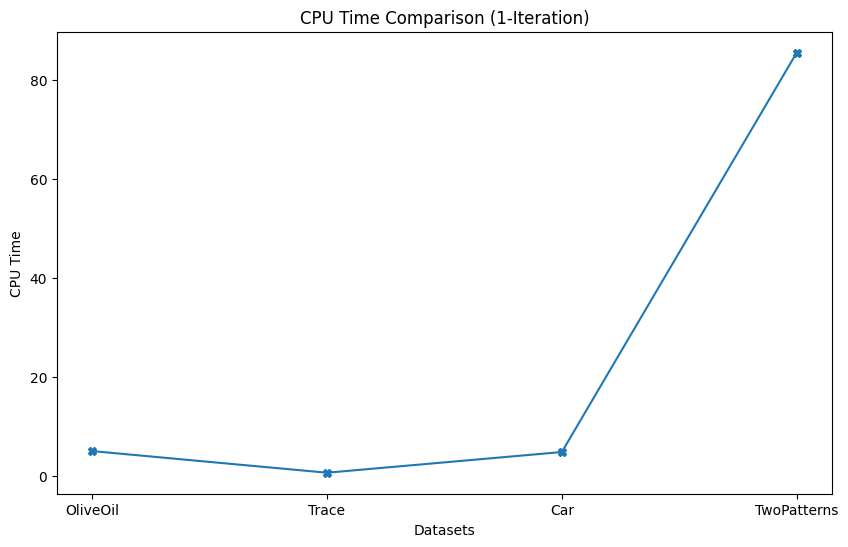

In [50]:
line_plot(x_plt,y_plt,'CPU Time Comparison (1-Iteration)','Datasets','CPU Time')

## Experiment 2

In [141]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []
iteration_number = 5

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_times = []
    for i in range(iteration_number):
        cpu_time = apply_kshape(dataset)
        cpu_times.append(cpu_time)
        print(f'Cpu Time for Dataset {dataset} in Iteration {i} is {cpu_time} seconds')
    y_plt.append(np.mean(cpu_times))

Cpu Time for Dataset OliveOil in Iteration 0 is 2.52817964553833 seconds
Cpu Time for Dataset OliveOil in Iteration 1 is 2.5266971588134766 seconds
Cpu Time for Dataset OliveOil in Iteration 2 is 1.0164165496826172 seconds
Cpu Time for Dataset OliveOil in Iteration 3 is 1.3877952098846436 seconds
Cpu Time for Dataset OliveOil in Iteration 4 is 1.8441760540008545 seconds
Cpu Time for Dataset Trace in Iteration 0 is 1.5299561023712158 seconds
Cpu Time for Dataset Trace in Iteration 1 is 0.7070815563201904 seconds
Cpu Time for Dataset Trace in Iteration 2 is 1.4496846199035645 seconds
Cpu Time for Dataset Trace in Iteration 3 is 1.433800458908081 seconds
Cpu Time for Dataset Trace in Iteration 4 is 0.7453734874725342 seconds
Cpu Time for Dataset Car in Iteration 0 is 2.871570110321045 seconds
Cpu Time for Dataset Car in Iteration 1 is 3.3295490741729736 seconds
Cpu Time for Dataset Car in Iteration 2 is 4.240783929824829 seconds
Cpu Time for Dataset Car in Iteration 3 is 2.287482738494873

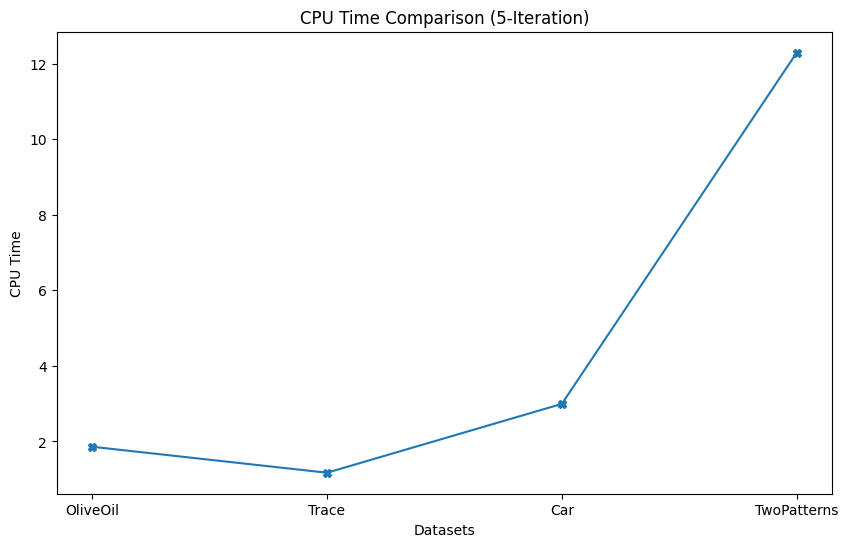

In [142]:
line_plot(x_plt,y_plt,'CPU Time Comparison (5-Iteration)','Datasets','CPU Time')

## K-Means

In [143]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt_k = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    cpu_time = apply_kmeans(dataset)
    print(f'Kmeans Cpu Time for Dataset {dataset} is {cpu_time} seconds')
    y_plt_k.append(cpu_time)

Kmeans Cpu Time for Dataset OliveOil is 0.15337681770324707 seconds
Kmeans Cpu Time for Dataset Trace is 0.16476106643676758 seconds
Kmeans Cpu Time for Dataset Car is 0.11707854270935059 seconds
Kmeans Cpu Time for Dataset TwoPatterns is 0.287567138671875 seconds


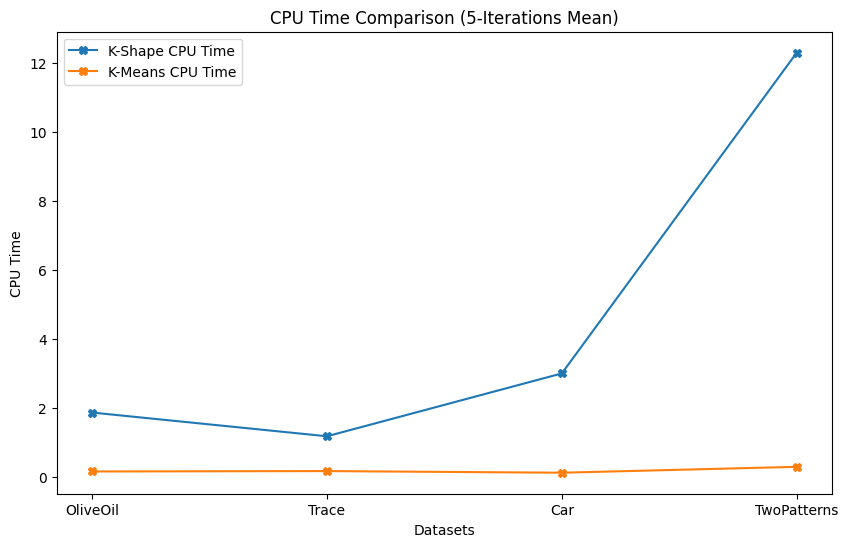

In [146]:
double_line_plot(x_plt,y_plt,y_plt_k,'CPU Time Comparison (5-Iterations Mean)','Datasets','CPU Time',['K-Shape CPU Time','K-Means CPU Time'])

## Accuracy


In [131]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt = []
iteration_number = 5

for dataset in dataset_lists:
    x_plt.append(dataset)
    accuracies = []
    for i in range(iteration_number):
        accuracy = kshape_accuracy(dataset)
        print(f'K-Shape Accuracy for Dataset {dataset} in Iteration {i} is {accuracy}')
        accuracies.append(accuracy)
    y_plt.append(np.mean(accuracies))

K-Shape Accuracy for Dataset OliveOil in Iteration 0 is 0.8160919540229885
K-Shape Accuracy for Dataset OliveOil in Iteration 1 is 0.8160919540229885
K-Shape Accuracy for Dataset OliveOil in Iteration 2 is 0.8574712643678161
K-Shape Accuracy for Dataset OliveOil in Iteration 3 is 0.8528735632183908
K-Shape Accuracy for Dataset OliveOil in Iteration 4 is 0.8114942528735632
K-Shape Accuracy for Dataset Trace in Iteration 0 is 0.7488888888888889
K-Shape Accuracy for Dataset Trace in Iteration 1 is 0.8622222222222222
K-Shape Accuracy for Dataset Trace in Iteration 2 is 0.7567676767676768
K-Shape Accuracy for Dataset Trace in Iteration 3 is 0.8622222222222222
K-Shape Accuracy for Dataset Trace in Iteration 4 is 0.7488888888888889
K-Shape Accuracy for Dataset Car in Iteration 0 is 0.6757062146892655
K-Shape Accuracy for Dataset Car in Iteration 1 is 0.6774011299435029
K-Shape Accuracy for Dataset Car in Iteration 2 is 0.6632768361581921
K-Shape Accuracy for Dataset Car in Iteration 3 is 0.66

In [132]:
np.mean(y_plt)

np.float64(0.7444748906549608)

In [133]:
y_plt

[np.float64(0.8308045977011493),
 np.float64(0.7957979797979797),
 np.float64(0.6740112994350282),
 np.float64(0.6772856856856857)]

In [134]:
dataset_lists = [ 'OliveOil', 'Trace', 'Car', 'TwoPatterns']
x_plt = []
y_plt_k = []

for dataset in dataset_lists:
    x_plt.append(dataset)
    accuracy = kmeans_accuracy(dataset)
    print(f'K-Means Accuracy for Dataset {dataset} is {accuracy}')
    y_plt_k.append(accuracy)

K-Means Accuracy for Dataset OliveOil is 0.8528735632183908
K-Means Accuracy for Dataset Trace is 0.7519191919191919
K-Means Accuracy for Dataset Car is 0.672316384180791
K-Means Accuracy for Dataset TwoPatterns is 0.6289089089089089


In [135]:
np.mean(y_plt_k)

np.float64(0.7265045120568207)

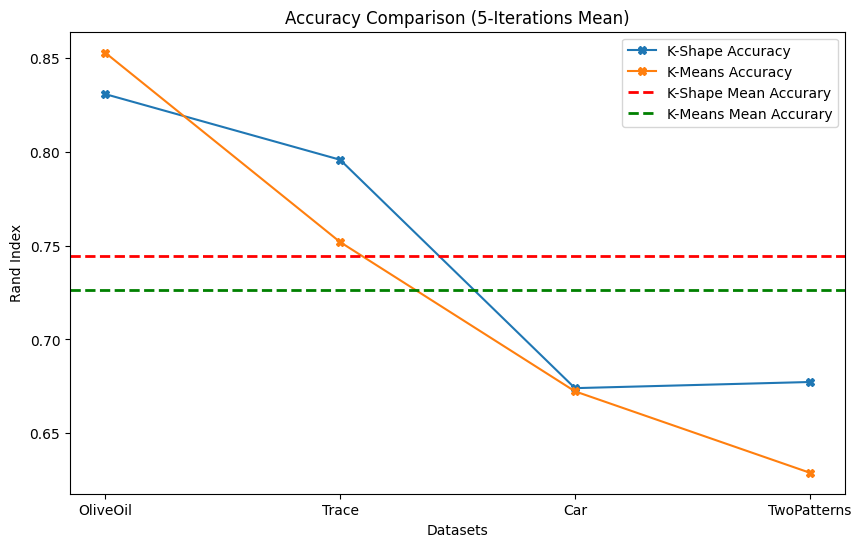

In [139]:
line_plot_wmean(x_plt,y_plt,y_plt_k,'Accuracy Comparison (5-Iterations Mean)','Datasets','Rand Index',['K-Shape Accuracy','K-Means Accuracy'])

## Experiment 3

In [155]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_row_index = int(ts.shape[0]*limit)
    limited_ts = ts[:last_row_index,:]
    #print(new_ts.shape)
    cpu_times = []
    for i in range(iteration_number):
        start_time = time.time()
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        cpu_time = time.time() - start_time 
        print(f'K-Shape CPU Time for Dataset {dataset} with {(limit*100)}% of time-series is {cpu_time} seconds (Iteration {i})')
        cpu_times.append(cpu_time)
    y_plt.append(np.mean(cpu_times))

K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 5.3995137214660645 seconds
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 3.2917637825012207 seconds
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 4.786638975143433 seconds
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 5.5140221118927 seconds
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 4.198644161224365 seconds
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 5.541283130645752 seconds
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 9.035570621490479 seconds
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 10.399734258651733 seconds
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 8.879818677902222 seconds
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 16.578149795532227 seconds
K-Shape CPU Time for Dataset TwoPatter

In [161]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt_c = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_column_index = round(ts.shape[1]*limit)
    limited_ts = ts[:,:last_column_index]
    print(limited_ts.shape)
    cpu_times = []
    for i in range(iteration_number):
        start_time = time.time()
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        cpu_time = time.time() - start_time 
        print(f'K-Shape CPU Time for Dataset {dataset} with {(limit*100)}% of time-series is {cpu_time} seconds (Iteration {i})')
        cpu_times.append(cpu_time)
    y_plt_c.append(np.mean(cpu_times))
    

(1000, 32)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 38.550312995910645 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 19.435981273651123 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 64.21318173408508 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 24.069125413894653 seconds (Iteration 3)
K-Shape CPU Time for Dataset TwoPatterns with 25.0% of time-series is 29.296470880508423 seconds (Iteration 4)
(1000, 64)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 20.772079467773438 seconds (Iteration 0)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 7.44173264503479 seconds (Iteration 1)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 6.605493783950806 seconds (Iteration 2)
K-Shape CPU Time for Dataset TwoPatterns with 50.0% of time-series is 20.43899631500244 second

In [162]:
DATASET_PATH = 'dataset/univariate_example/ExperimentDatasets'
DATASET_NAME = 'TwoPatterns'
dataloder = ClusterDataLoader(DATASET_PATH)
ts, labels, num_clusters = dataloder.load(DATASET_NAME)
iteration_number = 5
x_plt = []
y_plt_ma = []
limits = [0.25,0.5,0.75,1]
for limit in limits:
    last_column_index = round(ts.shape[1]*limit)
    limited_ts = ts[:,:last_column_index]
    print(limited_ts.shape)
    cpu_times = []
    for i in range(iteration_number):
        start_time = time.time()
        ksc = KShapeClusteringCPU(n_clusters=num_clusters,max_iter=100,n_jobs=-1)
        ksc.fit(np.expand_dims(limited_ts, axis=2))
        predictions = ksc.labels_
        accuracy = rand_score(labels,predictions)
        print(f'K-Shape Accuracy for Dataset {dataset} with {(limit*100)}% of time-instants is {accuracy} (Iteration {i})')
    y_plt_ma.append(np.mean(accuracy))

(1000, 32)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6297957957957958 (Iteration 0)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6312892892892893 (Iteration 1)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6316496496496496 (Iteration 2)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.629995995995996 (Iteration 3)
K-Shape Accuracy for Dataset TwoPatterns with 25.0% of time-instants is 0.6321641641641642 (Iteration 4)
(1000, 64)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.687011011011011 (Iteration 0)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6749469469469469 (Iteration 1)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6717397397397398 (Iteration 2)
K-Shape Accuracy for Dataset TwoPatterns with 50.0% of time-instants is 0.6577697697697698 (Iteration 3)
K-Shape Accuracy for Dataset TwoPat